In [ ]:
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.utils import np_utils
import time

In [ ]:
pickle_in_features = open('/content/drive/MyDrive/pkl-files/features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('/content/drive/MyDrive/pkl-files/labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
y = to_categorical(y)

In [ ]:
print(len(x))
print(len(y))

3008
3008


In [ ]:
print(x.shape)

(3008, 224, 224, 3)


In [ ]:
print(y.shape)

(3008, 3)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105, 3)


In [ ]:
num_classes = 3

image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

last_layer = model.get_layer('avg_pool').output
X = last_layer
d1 = Dropout(0.1)(X)
out = Dense(num_classes, activation='softmax', name='output_layer')(d1)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()


102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable = False


custom_resnet_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)
print('Training time: %s' % (t - time.time()))


Epoch 1/15
53/53 - 32s - loss: 0.6464 - accuracy: 0.3515 - val_loss: 0.6283 - val_accuracy: 0.3254 - 32s/epoch - 598ms/step
Epoch 2/15
53/53 - 14s - loss: 0.6221 - accuracy: 0.4287 - val_loss: 0.6001 - val_accuracy: 0.5297 - 14s/epoch - 256ms/step
Epoch 3/15
53/53 - 13s - loss: 0.6012 - accuracy: 0.5113 - val_loss: 0.5837 - val_accuracy: 0.6793 - 13s/epoch - 254ms/step
Epoch 4/15
53/53 - 13s - loss: 0.5836 - accuracy: 0.5220 - val_loss: 0.5705 - val_accuracy: 0.6152 - 13s/epoch - 254ms/step
Epoch 5/15
53/53 - 14s - loss: 0.5677 - accuracy: 0.5790 - val_loss: 0.5560 - val_accuracy: 0.6960 - 14s/epoch - 255ms/step
Epoch 6/15
53/53 - 14s - loss: 0.5602 - accuracy: 0.5784 - val_loss: 0.5491 - val_accuracy: 0.5891 - 14s/epoch - 255ms/step
Epoch 7/15
53/53 - 14s - loss: 0.5489 - accuracy: 0.5849 - val_loss: 0.5375 - val_accuracy: 0.6128 - 14s/epoch - 255ms/step
Epoch 8/15
53/53 - 13s - loss: 0.5375 - accuracy: 0.5986 - val_loss: 0.5449 - val_accuracy: 0.5748 - 13s/epoch - 254ms/step
Epoch 9/

In [ ]:
(loss, accuracy) = custom_resnet_model.evaluate(x_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 [==============================] - 9s 92ms/step - loss: 0.4962 - accuracy: 0.6888
[INFO] loss=0.4962, accuracy: 68.8815%


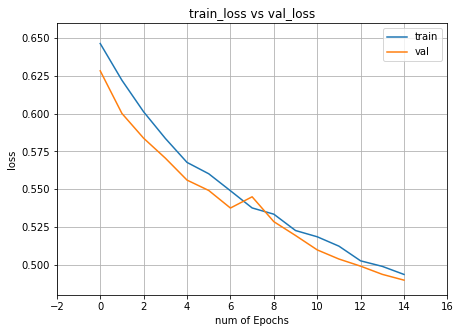

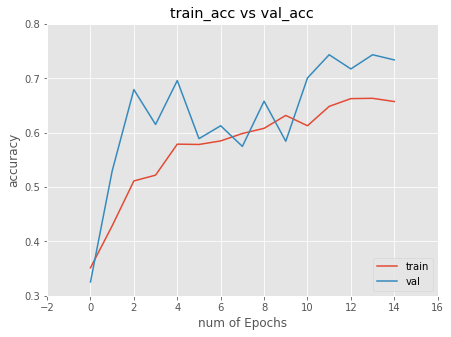

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(15)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])